_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung Übung 07 - Archäologie: Visualisierung über einer Landkarte
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
In diesem Tutorium möchten wir uns damit beschäftigen, Daten denen eine Räumliche Information zugeordnet ist auf einer Landkarte zu visualisieren. Dafür beschäftigen wir uns zuerst mit sog. "Scatterplots", die es uns erlauben, Datenpunkte anhand ihrer x- und y-Koordinaten darzustellen. Dieses Wissen wenden wir dann an, um die Anzahl der Fundstücke im Mittelmehrraum graphisch darzustellen.

Das Tutorial gliedert sich in
* [Scatterplots und Orte](#spatterplots)
* [Landkarten](#landkarten)

<a name="scatterplots"></a>1. Scatterplots und Orte
---
Die Funktion ```plt.scatter(x,y)``` ([Dokumentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)) erlaubt es uns, einen einfachen Scatterplot zu erstellen:

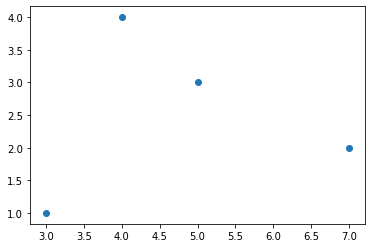

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [3,5,7,4]
y = [1,3,2,4]

plt.scatter(x,y)

**A.** Mache dich mit den Verschiedenen Argumenten der Funktion ```scatter()``` vertraut. Du kannst der Funktion z.B. mit dem Argument ```s``` eine Liste an Größen und mit dem Argument ```c``` eine Liste an Farben übergeben, um die Größe und Farbe der einzelnen dargestellten Punkte zu modifizieren.

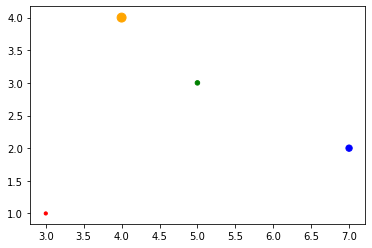

In [2]:
sizes = [10,20,40,80]
colors = ['red', 'green', 'blue', 'orange']

plt.scatter(x,y, s=sizes, c=colors)

Wir laden den Fundstücke-Katalog und die Tabelle ```ÌCRATES_LOCATION.csv```, in der die Längen- und Breitengrade der verschiedenen Fundorte vermerkt sind:

In [3]:
import pandas as pd
catalogue = pd.read_csv("data/ICRATES_CATALOGUE.csv", encoding='ISO-8859-1')
location = pd.read_csv('data/ICRATES_LOCATION.csv', encoding = "ISO-8859-1", low_memory=False)
location.head()

/anaconda/envs/networks/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Location_ID,Location_simple,Longitude,Latitude,Coordinates_uncertain,Harbour,Sea,River,River_navigability,...,Modern_country,Late_Hellenistic_Area_Provincia,Early_Imperial_Province,Middle_Imperial_Province,Early_Byzantine_region,Comment_Remarks,BA_map_reference,BA_Rank,BA_rank_uncertain,Pleiades_URL
0,0,1,aazaz,37.004606,36.519218,0,0,not_available,not_available,not_available,...,Syria,Syria,Syria,not_available,not_available,none,not_available,4,0,not_available
1,1,2,abdera,24.973047,40.933650,0,1,Thracium/Macedonicum_Mare,not_available,not_available,...,Greece,not_available,Thracia,Thracia_Rhodope,not_available,none,51_D3,4,0,https://pleiades.stoa.org/places/501323
2,2,3,abu_jiffa,0.000000,0.000000,1,0,not_available,not_available,not_available,...,Israel,not_available,Arabia,not_available,Palaistine_III,none,not_available,0,1,not_available
3,3,6,adulis,39.663840,15.244510,0,1,Red_Sea,not_available,not_available,...,Eritrea,Barbaricum,Barbaricum,Barbaricum,Barbaricum,Study of the coastal change since Antiquity su...,not_available,3,1,not_available
4,4,10,agioi_pandes,21.679860,38.661422,0,0,not_available,not_available,not_available,...,Greece,Achaia,Achaia,Achaia,Hellas,none,not_available,4,1,not_available


**B.** Wieviele verschiedene Fundorte gibt es? In welchen (modernen) Ländergrenzen liegen sie?

In [4]:
print('Es gibt {} verschiedene Fundorte'.format(len(location)))
print('Die Fundorte liegen in:')
location.Modern_country.unique()

Es gibt 275 verschiedene Fundorte
Die Fundorte liegen in:


array(['Syria', 'Greece', 'Israel', 'Eritrea', 'Turkey', 'Egypt', 'Italy',
       'Cyprus', 'Jordan', 'Libya', 'India', 'Ethiopia', 'Iraq',
       'Lebanon', 'Albania', 'Tunisia', 'United_Arab_Emirates', 'Sudan',
       'Malta', 'Yemen', 'Macedonia', 'Oman'], dtype=object)

**C.** Stelle die Fundorte als Scatterplot dar. In welchem Bereich (Längen- und Breitengrad) liegen die Datenpunkte? Was hat es mit dem Punkt bei (0,0) auf sich?

Text(0.5, 1.0, 'Scherbenfundorte im Mittelmeerraum')

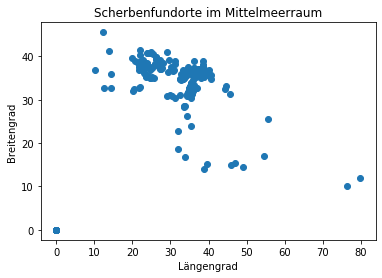

In [5]:
x = location['Longitude']
y = location['Latitude']

plt.scatter(x,y)
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.title('Scherbenfundorte im Mittelmeerraum')

In [6]:
# Einträge mit Longitude = 0 und Latitude = 0 stellen offensichtlich Fundorte
# dar, bei denen Längen- und Breitengrad unbekannt sind. Wir können alle Nullen
# mit NaN ersetzen, damit wir im Folgenden einfacher mit diesen Spalten rechnen
# können

# importiere die Bibliothek NumPy, die uns den NaN Wert zur Verfügung stellt
import numpy as np
# ersezte alle Nullen mit np.nan (inplace=True gibt an, dass die
# Ersetzung direkt (inplace) erfolgen soll, und keine Kopie des
# DataFrame dabei erstellt werden soll).
location['Longitude'].replace(0, np.nan, inplace=True)
location['Latitude'].replace(0, np.nan, inplace=True)

In [7]:
# sind die fehlenden Einträge erst einmal herausgefiltert, lassen sich
# z.B. der minimale und maximale Längengrad (und Breitengrad) sehr leicht herausfinden
print('Es gibt {} Fundorte mit bekannten Koordinaten'.format(len(location.dropna())))
print('Der Längengrad liegt zwischen {:1.2f} und {:1.2f}'\
      .format(location['Longitude'].min(), location['Longitude'].max()))
print('Der Breitengrad liegt zwischen {:1.2f} und {:1.2f}'\
      .format(location['Latitude'].min(), location['Latitude'].max()))

Es gibt 233 Fundorte mit bekannten Koordinaten
Der Längengrad liegt zwischen 10.32 und 79.82
Der Breitengrad liegt zwischen 10.15 und 45.56


Um herauszufinden, wieviele Fundstücke es pro Fundort gibt, müssen wir den Katalog nach der ```Location_ID``` filtern. Um z.B. die Anzahl der Fundstücke mit der ID 1 zu finden, gehen wir wie folgt vor:

In [8]:
# nach dieser ID suchen wir
ID = 1

# wir wollen auch direkt den Namen des Fundortes herausfinden, dafür
# erstellen wir eine Maske 
name_mask = location['Location_ID'] == ID
# und filtern dann dass "location" DataFrame entsprechend
location_name = location[name_mask]['Location_simple'][0]

# um alle Fundstücke, die an einem bestimmten Fundort mit einer
# gegebenen ID gefunden wurden im Katalog zu finden, erstellen
# wir ebenfalls eine Maske
location_id_mask = catalogue['Location_ID'] == ID

# wir filtern den Katalog mit Hilfe der Maske...
filtered = catalogue[location_id_mask]
# ...und zählen die Fundstücke
count = len(filtered)

print('Am Fundort {} (ID {}) wurden {} Fundstücke gefunden.'\
      .format(location_name, ID, count))

Am Fundort aazaz (ID 1) wurden 9 Fundstücke gefunden.


**D.** Iteriere über alle Location IDs in der ```location``` Tabelle. Finde für jeden Fundort heraus, wieviele Fundstücke dort gefunden wurden. Speichere die Ergebnisse in einer neuen Liste, füge die Liste dem ```location``` DataFrame als neue Spalte hinzu.

In [9]:
sherd_count = []
for ID in location['Location_ID']:
    location_id_mask = catalogue['Location_ID'] == ID
    filtered = catalogue[location_id_mask]
    count = len(filtered)
    sherd_count.append(count)
    
location['Sherd_Count'] = sherd_count

<a name="landkarten"></a>2. Landkarten
---
Der in Aufgabe **1.C** erstellte Scatterplot der Fundorte ist schwer zu interpretieren. Insbesondere fehlt uns der Kontext der Geographie wie Ländergrenzen, Landmassen und Wasser. Um die Darstellung zu verbessern, ist es z.B. sinnvoll, im Hintergrund des Scatterplots eine Landkarte der Gegend darzustellen. 

### Exkurs zu Geopandas
Um Landkarten darzustellen, gibt es in ```Python``` die spezialisierte Bibliothek ```geopandas```, mit der sehr einfach Landkarten dargestellt werden können. Da die Bibliothek auf dem JupyterHub noch nicht vorinstalliert ist, müssen wir sie erst einmal selbst herunterladen und installieren:

In [10]:
# die nachfolgenden Kommandos musst du dir nicht merken. Falls du jemals eine
# eigene Bibliothek nachinstallieren willst, ersezte "geopandas" mit dem
# Namen der von dir benötigten Bibliothek

# die Bibliothek "sys" gibt uns Zugriff auf Funktionen des Betriebssystems
# mit dem Operator "!" führen wir Code nicht im Python-Interpreter sondern
# auf der Kommandozeile aus. 
import sys
!{sys.executable} -m pip install geopandas

# importiere das frisch installierte geopandas unter dem Kürzel "gpd"
import geopandas as gpd

     |████████████████████████████████| 921kB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 13.4MB 4.4MB/s eta 0:00:01    |██▏                             | 921kB 6.7MB/s eta 0:00:02     |███                             | 1.2MB 6.7MB/s eta 0:00:02     |██████▋                         | 2.8MB 6.7MB/s eta 0:00:02     |█████████████████████████▋      | 10.7MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 6.4MB/s eta 0:00:01�█████▊                    | 573kB 6.4MB/s eta 0:00:01��████████▏     | 1.3MB 6.4MB/s eta 0:00:01
     |████████████████████████████████| 18.0MB 316kB/s  eta 0:00:01    |████████████████                | 9.1MB 15.2MB/s eta 0:00:01     |██████████████████████▋         | 12.8MB 28.3MB/s eta 0:00:01     |█████████████████████████▋      | 14.4MB 28.3MB/s eta 0:00:01     |████████████████████████████▌   | 16.0MB 28.3MB/s eta 0:00:01     |███████████████████████████████ | 17.5MB 28.3MB/s eta 0:00:01
     |████████████████████████████████| 81k

Um Landkarten darstellen zu können, brauchen wir erst einmal Informationen über den Verlauf der Ländergrezen. Diese sind standardisiert in sog. "shape-files" abgelegt. shape-files sind vielfach öffentlich zum Download verfügbar, z.B. auf [dieser](https://gadm.org/download_country_v3.html) Website. Die shape-files für Deutschland haben wir im Ordner ```gadm36_DEU_sh``` im StudIP hochgeladen. Der Ordner enthält eine Reihe von verschiedenen Dateien, die geopandas benötigt, um das shape-file korrekt einzulesen. Informationen liegen außerdem in verschiedenen "Ebenen" vor:
* Ebene 0 ist die Ländergrenze von Deutschland
* Ebene 1 ist enthält außerdem die Grenzen der Bundesländer
* Ebene 2 enthält die Grenzen der Landkreise
* Ebene 3 enthält die Grenzen der Gemeinden

Wast du die Informationen über die Grenzen heruntergeladen, kannst du es sie geopandas einlesen:

In [11]:
# lies das shape-file ein
DEU_map = gpd.read_file('data/gadm36_DEU_shp/gadm36_DEU_1.shp')

# das shape-file bzw. die darin enthaltene Karte verhält sich wie ein DataFrame
DEU_map.head()

DriverError: data/gadm36_DEU_shp/gadm36_DEU_1.shp: No such file or directory

Wir können die Landkarte ganz einfach darstellen (dabei wird im Hintergrund auf die Funktionalität der Bibliothek ```matplotlib``` zurückgegriffen:

In [ ]:
# Darstellen der Landkarte
DEU_map.plot()

Um einen Punkt auf der Landkarte darzustellen, müssen wir uns das Achsen-Objekt, auf dem der aktuelle Plot dargestellt ist, von matplotlib geben lassen. Das machen wir mit der Funktion ```gca()``` (für "get current axis"). Mit diesem Achsen-Objekt können wir dann wie gewohlt die Funktion ```scatter()``` ausführen:

In [ ]:
# Darstellen der Landkarte
DEU_map.plot()
# Achsenobjekt liefern lassen
ax = plt.gca()
# einen roten Punkt auf der Landkarte darstellen
ax.scatter(8, 51, color='red')

Damit haben wir alle nötigen Zutaten, um die Fundorte der Fundstücke auf einer Landkarte darzustellen!

**A.** Lade die shape-files von Griechenland herunter. Stelle die level 1 Karte (Bundesländer) wie oben für Deutschland gezeigt dar. Zeichne einen Punkt an der Position von Athen ein.

Die shape-files finden wir [hier](https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_GRC_shp.zip), die Koordinaten von Athen finden wir z.B. [hier](https://de.wikipedia.org/wiki/Athen). 

In [ ]:
# lies das shape-file ein
GRC_map = gpd.read_file('data/gadm36_GRC_shp/gadm36_GRC_1.shp')

# das shape-file bzw. die darin enthaltene Karte verhält sich wie ein DataFrame
GRC_map.head()

In [ ]:
# wichtig hierbei: die Längen- und Breitengrade werden auf Wikipedia
# in Graden, Minuten und Sekunden angegeben. Diese müssen wir erst in 
# Dezimalstellen konvertieren. Die hier angegebenen Werten sind bereits
# konvertiert
lat_athens = 37.983
lon_athens = 23.733

# stelle die Karte dar, mit dem Argument "alpha=0.7"
# können wir die Karte etwas transparenter machen, um
# andere Dinge auf der Darstellung leichter erkennbar
# zu machen
GRC_map.plot(alpha=0.7)
ax = plt.gca()

# roter Punkt an der Stelle von Athen
ax.scatter(lon_athens, lat_athens, color='red') 

# außerdem können wir mit der Funktion "text()" noch
# eine Beschriftung hinzufügen
ax.text(lon_athens + 0.1, lat_athens + 0.1, 'Athen', fontsize=16)

**B.** Wir wollen im Folgenden nur die Fundorte betrachten, die in und um Griechenland liegen. Eine kurze Suche mit Google Maps zeigt  

Ort | Beschreibung | Breitengrad | Längengrad
--- | -------------| -----------| -----------  
Othoni | westlichster Punkt | 39.851232 | 19.391932
Trigono | nörtlichster Punkt | 41.746835 | 26.174643  
Rodos | östlichster Punkt (Zypern ausgenommen) | 36.438004 | 28.241690
Gavdos | südlichster Punkt | 34.803067 | 24.122037

Filtere die Location-Tabelle, so dass nur die Orte innerhalb Griechenlands verbleiben (du  kannst davon ausgehen, dass die "Ländergrenzen" von Griechenland vom nördlichsten, südlichsten, östlichsten und westlichsten Punkt des Landes aufgespannt werden).

In [ ]:
# erstelle einen Filter mit den oben angegeben Koordinaten
# (liegen schon als Dezimalzahlen vor)
filter_greece = (location['Longitude'] > 19.39) & \
                (location['Longitude'] < 28.25) & \
                (location['Latitude'] > 34.8) & \
                (location['Latitude'] < 41.75)

# filtere das location-DataFrame
locations_greece = location[filter_greece]
locations_greece.head()

**C.** Stelle alle Fundorte in Griechenland auf der Griechenland-Karte als Punkte dar.

In [ ]:
GRC_map.plot(alpha=0.7)

ax = plt.gca()
ax.scatter(locations_greece['Longitude'], locations_greece['Latitude'],\
          color='red')

**D.** Als letzten Schritt skaliere nun die Größe der Punkte der Fundorte mit der Anzahl der gefundenen Fundstücke. Benutze dafür das Argument ```s``` der Funktion ```scatter()```, dem du eine Liste der Größen übergeben kannst. Dafür kannst du die in Aufgabe **1.D** erstellte Liste der Funstückanzahl je Fundort verwenden.

In [ ]:
GRC_map.plot(alpha=0.7)
ax = plt.gca()
ax.scatter(locations_greece['Longitude'], locations_greece['Latitude'],\
          s=locations_greece['Sherd_Count'],color='red',alpha=0.3,\
          label='Anzahl')
ax.set_xlabel('Längengrad')
ax.set_ylabel('Breitengrad')
ax.set_title('Anzahl an Fundstücken in Griechenland')
ax.legend()

**E.** An welchen Orten wurden die meisten Fundstücke gefunden? Woran kann das deiner Meinung nach liegen?

**F. (optional)** Darstellen der Fundorte im gesamten Mittelmeerraum:
* Finde heraus, in welchen 10 (modernen) Ländern die meisten Fundstücke gefunden wurden
* Lade die shape-files dieser Länder herunter.
* Stelle die Landkarten dieser Länder in einer Darstellung dar  <font color='green'>**HINWEIS:** Du kannst der Funktion ```plot()``` mit dem Argument ```ax=``` eine spezifische Achse mitgeben, auf der die Darstellung geplottet werden soll. </font>.
* Stelle alle Fundorte in diesen Ländern mit Kreuzen dar.

In [ ]:
# leere Liste
mod_countries = []

# wir iterieren über alle Location IDs
for loc_ID in catalogue.Location_ID:
    if pd.isna(loc_ID): # wenn keine ID verfuegbar ist, packen wir nan in die liste
        mod_countries.append(np.nan)
    else:           # sonst den passenden Wert aus der Formen Tabelle
        mod_country = location[location['Location_ID'] == loc_ID]['Modern_country']
        #print(mod_country.item())
        mod_countries.append(mod_country.item())
        
catalogue['Modern_country'] = mod_countries

In [ ]:
country_counts = []

for country in location.Modern_country.unique():
    country_mask = catalogue['Modern_country'] == country
    count = len(catalogue[country_mask])
    country_counts.append(count)
    
country_counts = pd.DataFrame({'Modern_country':location.Modern_country.unique(),\
                              'count':country_counts})

# die 10 Länder mit den meisten Fundstücken sind Griechenland, 
# die Türkei und Israel
country_counts.sort_values('count', ascending=False, inplace=True)
country_counts.head(10)

In [ ]:
countries = ['GRC', 'TUR', 'ISR', 'SYR', 'CYP', 'LBY', 'TUN', 'EGY', 'MKD', 'JOR']
countries.extend([np.nan] * (len(country_counts) - len(countries)))
country_counts['Country_code'] = countries
country_dict = {}

for c in country_counts['Country_code'][0:10]:
    filepath = 'data/gadm36_{}_shp/gadm36_{}_1.shp'.format(c,c)
    country_dict.update({c: gpd.read_file(filepath)})

In [ ]:
GRC_map.plot(alpha=0.7)
ax = plt.gca()

for c in country_counts['Country_code'][1:10]:
    country_dict[c].plot(ax = ax, alpha=0.7)

In [ ]:
location['Modern_country'][0] in list(country_counts['Modern_country'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for c in country_counts['Country_code'][0:10]:
    country_dict[c].plot(ax = ax, alpha=0.7)

for i,row in location.iterrows():
    if row['Modern_country'] in list(country_counts['Modern_country'][0:10]):
        ax.scatter(row['Longitude'], row['Latitude'], marker='x', s=10, color='red')
    